<a href="https://colab.research.google.com/github/govardhan-06/ML-models/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_csv("used_cars.csv")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### EDA + Data preprocessing

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [10]:
#Null values
df.isnull().sum()

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64

In [11]:
#Duplicate rows
duplicate = df[df.duplicated()]
duplicate

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price


### Insights: No duplicates

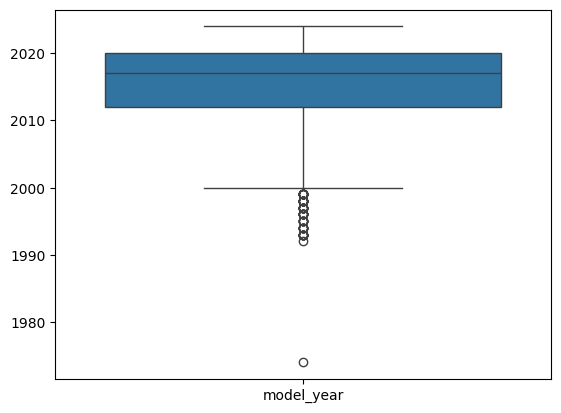

In [12]:
#Outiers
sns.boxplot(data=df)
plt.show()

### Insights: Absence of outliers

In [13]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


### Handling Missing Values

In [14]:
df["clean_title"]=df["clean_title"].fillna("No")
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,No,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,No,"$34,999"


In [15]:
df['clean_title'].value_counts()

clean_title
Yes    3413
No      596
Name: count, dtype: int64

In [16]:
df["not_clean_title"]=pd.get_dummies(df["clean_title"],dtype=int,drop_first=True)
df.drop(["clean_title"],axis=1,inplace=True)
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,not_clean_title
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300",1
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005",1
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598",0
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500",1
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999",0


### Age of car

In [17]:
import datetime

# Get the current date and time
now = datetime.datetime.now()

# Get the current year
current_year = now.year

# Calculate the age of the car
df['Age'] = current_year - df['model_year']

# Drop the 'Year' column
df.drop('model_year', axis=1, inplace=True)

df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price,not_clean_title,Age
0,Ford,Utility Police Interceptor Base,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,"$10,300",1,11
1,Hyundai,Palisade SEL,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,"$38,005",1,3
2,Lexus,RX 350 RX 350,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,"$54,598",0,2
3,INFINITI,Q50 Hybrid Sport,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,"$15,500",1,9
4,Audi,Q3 45 S line Premium Plus,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,"$34,999",0,3


### Type casting price to price in $

In [18]:
df["price (in $)"]=[int(i.strip("$").replace(",","")) for i in df['price']]
df.drop("price",axis=1,inplace=True)
df.head()

,brand,model,milage,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $)
0,Ford,Utility Police Interceptor Base,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,1,11,10300
1,Hyundai,Palisade SEL,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,1,3,38005
2,Lexus,RX 350 RX 350,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,0,2,54598
3,INFINITI,Q50 Hybrid Sport,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,1,9,15500
4,Audi,Q3 45 S line Premium Plus,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,0,3,34999


### Typecasting mileage to mileage in mi.

In [19]:
df['mileage (in miles)']=[int(i.strip("mi.").replace(",","")) for i in df['milage']]
df.drop("milage",axis=1,inplace=True)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,0,3,34999,9835


### Encoding Internal Color

In [20]:
df['int_col'].value_counts().index

Index(['Black', 'Beige', 'Gray', 'Brown', '–', 'White', 'Red', 'Jet Black',
       'Ebony', 'Blue',
       ...
       'Dark Auburn', 'Obsidian Black', 'Boulder', 'Caramel', 'Orchid',
       'Almond Beige', 'Kyalami Orange', 'Sakhir Orange', 'Tan/Ebony',
       'Black / Graphite'],
      dtype='object', name='int_col', length=156)

In [21]:
df['int_col'].isnull().sum()

0

In [22]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("int_col")["price (in $)"].mean().sort_values(ascending=False))
print("\n")
print("Grouping by median of price:\n",df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False))

Grouping by mean of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Carbon Black       17999.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     11829.8
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


Grouping by median of price:
 int_col
Charles Blue      695000.0
Cobalt Blue       599995.0
Black / Brown     489000.0
Brandy            479995.0
Grace White       449995.0
                    ...   
Gold               17750.0
Light Titanium     17550.0
Ebony.             14798.0
Charcoal Black     12599.0
Dark Gray          11515.5
Name: price (in $), Length: 156, dtype: float64


In [23]:
df['int_col'].value_counts()

int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64

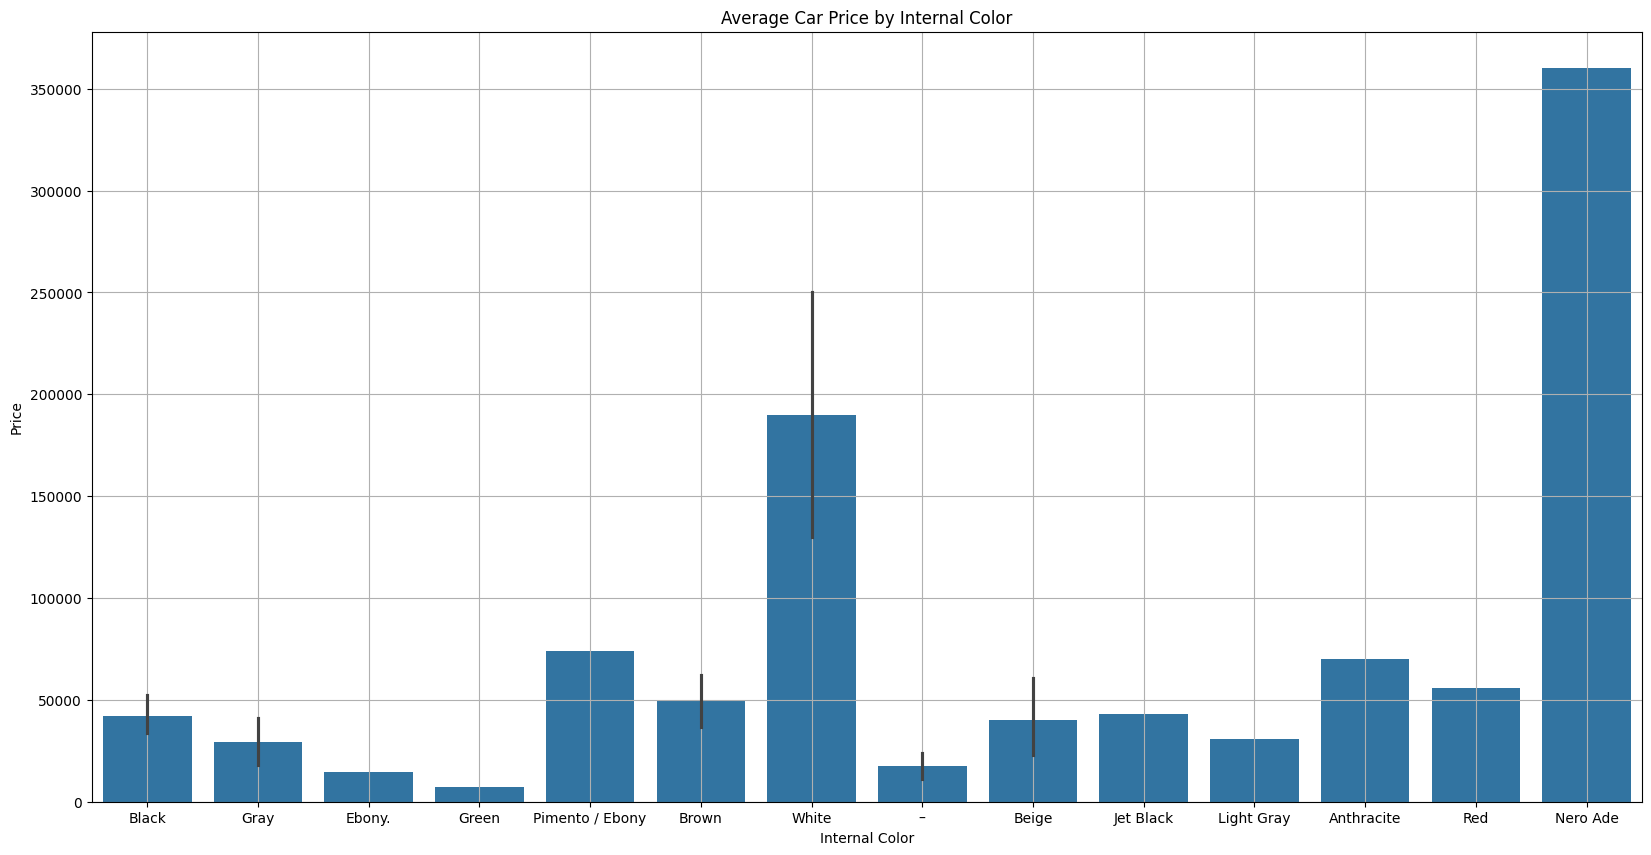

In [24]:
plt.figure(figsize=(20, 10))
sns.barplot(x=df["int_col"][:80], y=df["price (in $)"])
plt.title('Average Car Price by Internal Color')
plt.xlabel('Internal Color')
plt.ylabel('Price')
plt.grid(True)
plt.show()

In [25]:
#Frequency encoding
print("Grouping by count:\n",df["int_col"].value_counts())

Grouping by count:
 int_col
Black               2025
Beige                538
Gray                 472
Brown                157
–                    133
                    ... 
Almond Beige           1
Kyalami Orange         1
Sakhir Orange          1
Tan/Ebony              1
Black / Graphite       1
Name: count, Length: 156, dtype: int64


In [26]:
#Targeted encoding
intColPrice=df.groupby("int_col")["price (in $)"].median().sort_values(ascending=False).to_dict()
df['int_col']=df["int_col"].map(intColPrice)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,32999.0,At least 1 accident or damage reported,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,19447.5,At least 1 accident or damage reported,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,Blue,32999.0,None reported,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,32999.0,None reported,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,32999.0,None reported,0,3,34999,9835


### Encoding external color

In [27]:
df['ext_col'].value_counts()

ext_col
Black                       905
White                       816
Gray                        496
Silver                      374
Blue                        349
                           ... 
Anthracite Blue Metallic      1
Moonlight Cloud               1
Silver Mist                   1
Cirrus Silver Metallic        1
C / C                         1
Name: count, Length: 319, dtype: int64

In [28]:
df.groupby("ext_col")["price (in $)"].mean().sort_values(ascending=False)

ext_col
Tempest                   599995.0
Balloon White             449991.0
China Blue                425000.0
Bianco Isis               399900.0
BLU ELEOS                 359991.0
                            ...   
Kinetic Blue               12999.0
Crimson Red Tintcoat       12433.0
Quartz Blue Pearl          11498.0
Twilight Blue Metallic      9995.0
Frozen White                9985.0
Name: price (in $), Length: 319, dtype: float64

In [29]:
#Targeted encoding
extColPrice=df.groupby("ext_col")["price (in $)"].median().sort_values(ascending=False).to_dict()
df['ext_col']=df['ext_col'].map(extColPrice)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,29950.0,32999.0,At least 1 accident or damage reported,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,38005.0,19447.5,At least 1 accident or damage reported,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,29000.0,32999.0,None reported,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,29950.0,32999.0,None reported,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,34999.0,32999.0,None reported,0,3,34999,9835


### Encoding accident column

In [30]:
#Handling null values
df["accident"]=df["accident"].fillna("None reported")
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,29950.0,32999.0,At least 1 accident or damage reported,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,38005.0,19447.5,At least 1 accident or damage reported,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,29000.0,32999.0,None reported,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,29950.0,32999.0,None reported,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,34999.0,32999.0,None reported,0,3,34999,9835


In [31]:
df['accident'].isnull().sum()

0

In [32]:
df['accident'].value_counts()

accident
None reported                             3023
At least 1 accident or damage reported     986
Name: count, dtype: int64

In [33]:
df.groupby("accident")["price (in $)"].mean().sort_values(ascending=False)

accident
None reported                             49681.072114
At least 1 accident or damage reported    28831.500000
Name: price (in $), dtype: float64

In [34]:
df['accident']=pd.get_dummies(df["accident"],dtype=int,drop_first=True)

In [35]:
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,29950.0,32999.0,0,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,38005.0,19447.5,0,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,Automatic,29000.0,32999.0,1,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,29950.0,32999.0,1,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,34999.0,32999.0,1,0,3,34999,9835


### Encoding transmission

<Axes: ylabel='transmission'>

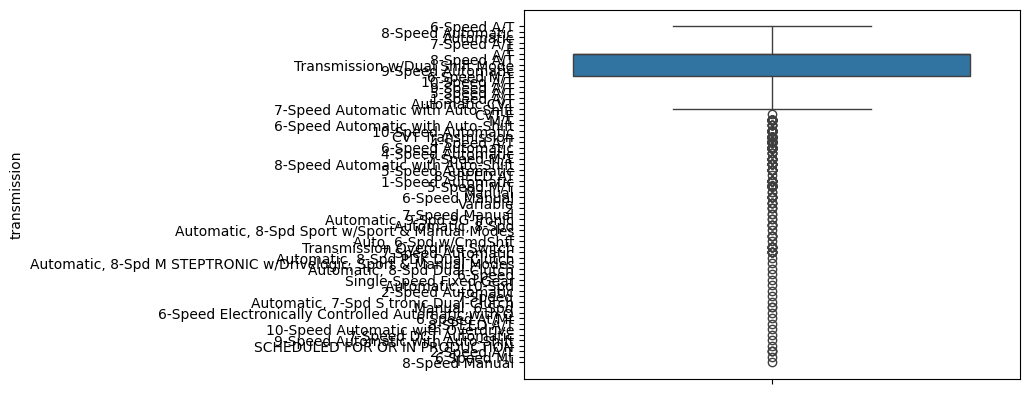

In [36]:
sns.boxplot(data=df["transmission"])

In [37]:
#Frequency encoding
df["transmission"].value_counts().sort_values(ascending=False)[:20]

transmission
A/T                               1037
8-Speed A/T                        406
Transmission w/Dual Shift Mode     398
6-Speed A/T                        362
6-Speed M/T                        248
Automatic                          237
7-Speed A/T                        209
8-Speed Automatic                  176
10-Speed A/T                       119
5-Speed A/T                         86
9-Speed A/T                         74
6-Speed Automatic                   73
4-Speed A/T                         72
1-Speed A/T                         64
CVT Transmission                    62
5-Speed M/T                         59
10-Speed Automatic                  56
9-Speed Automatic                   47
M/T                                 40
Automatic CVT                       37
Name: count, dtype: int64

In [38]:
pd.set_option("display.max_rows",None)
print(df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False))
pd.reset_option("display.max_rows")

transmission
7-Speed                                                             749950.0
8-SPEED A/T                                                         289991.0
Automatic, 8-Spd Dual-Clutch                                        238900.0
Manual                                                              220748.0
7-Speed DCT Automatic                                               215000.0
7-Speed Manual                                                      211949.5
8-Speed Automatic with Auto-Shift                                   197750.0
7-Speed Automatic with Auto-Shift                                   188400.0
9-Speed Automatic with Auto-Shift                                   143900.0
Manual, 6-Spd                                                       125950.0
–                                                                   111499.0
10-Speed Automatic with Overdrive                                   109900.0
2-Speed Automatic                                              

In [39]:
transmission_Price=df.groupby("transmission")["price (in $)"].median().sort_values(ascending=False).to_dict()
df["transmission"]=df["transmission"].map(transmission_Price)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,20900.0,29950.0,32999.0,0,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,3.8L V6 24V GDI DOHC,41599.0,38005.0,19447.5,0,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,3.5 Liter DOHC,47541.0,29000.0,32999.0,1,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,32999.0,29950.0,32999.0,1,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,2.0L I4 16V GDI DOHC Turbo,41599.0,34999.0,32999.0,1,0,3,34999,9835


### Encoding engine

In [40]:
#Target guided encoding
Engine_Price=df.groupby("engine")["price (in $)"].median().to_dict()
df["engine"]=df["engine"].map(Engine_Price)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,Ford,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000
1,Hyundai,Palisade SEL,Gasoline,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742
2,Lexus,RX 350 RX 350,Gasoline,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372
3,INFINITI,Q50 Hybrid Sport,Hybrid,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900
4,Audi,Q3 45 S line Premium Plus,Gasoline,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835


### Encoding Brand

In [41]:
brand_Price=df.groupby("brand")["price (in $)"].median().sort_values(ascending=False).to_dict()
df["brand"]=df["brand"].map(brand_Price)
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,32377.5,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000
1,16750.0,Palisade SEL,Gasoline,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742
2,30000.0,RX 350 RX 350,Gasoline,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372
3,19900.0,Q50 Hybrid Sport,Hybrid,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900
4,34497.5,Q3 45 S line Premium Plus,Gasoline,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835


### Encoding Fuel

In [42]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3309
Hybrid             194
E85 Flex Fuel      139
Diesel             116
–                   45
Plug-In Hybrid      34
not supported        2
Name: count, dtype: int64

In [43]:
df["fuel_type"].isnull().sum()

170

In [44]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51426.195876
Diesel            48695.422414
Plug-In Hybrid    45946.176471
Gasoline          44538.525839
–                 35745.888889
E85 Flex Fuel     22744.115108
not supported     14000.000000
Name: price (in $), dtype: float64

In [45]:
df["fuel_type"]=np.where(df["fuel_type"]=="–","not supported",df["fuel_type"])
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles)
0,32377.5,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000
1,16750.0,Palisade SEL,Gasoline,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742
2,30000.0,RX 350 RX 350,Gasoline,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372
3,19900.0,Q50 Hybrid Sport,Hybrid,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900
4,34497.5,Q3 45 S line Premium Plus,Gasoline,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835


In [46]:
df.groupby("fuel_type")["price (in $)"].mean().sort_values(ascending=False)

fuel_type
Hybrid            51426.195876
Diesel            48695.422414
Plug-In Hybrid    45946.176471
Gasoline          44538.525839
not supported     34820.531915
E85 Flex Fuel     22744.115108
Name: price (in $), dtype: float64

In [47]:
categoryCount=df['fuel_type'].value_counts()
[f"{categoryCount.index[i]} -> {categoryCount.values[i]}"for i in range(len(categoryCount))]

['Gasoline -> 3309',
 'Hybrid -> 194',
 'E85 Flex Fuel -> 139',
 'Diesel -> 116',
 'not supported -> 47',
 'Plug-In Hybrid -> 34']

In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['fuel_type_Encoded']=le.fit_transform(df['fuel_type'])
df.head()

,brand,model,fuel_type,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles),fuel_type_Encoded
0,32377.5,Utility Police Interceptor Base,E85 Flex Fuel,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000,1
1,16750.0,Palisade SEL,Gasoline,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742,2
2,30000.0,RX 350 RX 350,Gasoline,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372,2
3,19900.0,Q50 Hybrid Sport,Hybrid,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900,3
4,34497.5,Q3 45 S line Premium Plus,Gasoline,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835,2


In [49]:
df.drop(['fuel_type'],axis=1,inplace=True)
df.head()

,brand,model,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles),fuel_type_Encoded
0,32377.5,Utility Police Interceptor Base,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000,1
1,16750.0,Palisade SEL,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742,2
2,30000.0,RX 350 RX 350,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372,2
3,19900.0,Q50 Hybrid Sport,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900,3
4,34497.5,Q3 45 S line Premium Plus,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835,2


### Encoding model

In [50]:
df['model'].value_counts()

model
M3 Base                    30
F-150 XLT                  24
Corvette Base              22
1500 Laramie               18
Camaro 2SS                 17
                           ..
XE 25t                      1
MC20 Base                   1
911 Carrera 4 Cabriolet     1
488 GTB Base                1
Taycan                      1
Name: count, Length: 1898, dtype: int64

In [51]:
#Target guided encoding
print("Grouping by mean of price:\n",df.groupby("model")["price (in $)"].mean())
print("\n")
print("Grouping by median of price:\n",df.groupby("model")["price (in $)"].median())

Grouping by mean of price:
 model
124 Spider Abarth         22500.000000
128 i                     18000.000000
135 i                     13933.333333
135 is                    29000.000000
1500 Big Horn             38601.909091
                              ...     
i8 Base                   78189.800000
tC Anniversary Edition    11246.500000
tC Base                    7100.000000
tC Release Series 6.0      6500.000000
xB Base                    8000.000000
Name: price (in $), Length: 1898, dtype: float64


Grouping by median of price:
 model
124 Spider Abarth         22500.0
128 i                     18000.0
135 i                     15300.0
135 is                    29000.0
1500 Big Horn             42000.0
                           ...   
i8 Base                   85000.0
tC Anniversary Edition    11246.5
tC Base                    7100.0
tC Release Series 6.0      6500.0
xB Base                    8000.0
Name: price (in $), Length: 1898, dtype: float64


In [52]:
#Target guided encoding
model_Price=df.groupby("model")["price (in $)"].median().sort_values(ascending=False).to_dict()
df["model_encoded_Price"]=df["model"].map(model_Price)
df.drop("model",axis=1,inplace=True)
df.head()

,brand,engine,transmission,ext_col,int_col,accident,not_clean_title,Age,price (in $),mileage (in miles),fuel_type_Encoded,model_encoded_Price
0,32377.5,8450.0,20900.0,29950.0,32999.0,0,1,11,10300,51000,1,10300.0
1,16750.0,43329.0,41599.0,38005.0,19447.5,0,1,3,38005,34742,2,32000.0
2,30000.0,54698.0,47541.0,29000.0,32999.0,1,0,2,54598,22372,2,54598.0
3,19900.0,17738.5,32999.0,29950.0,32999.0,1,1,9,15500,88900,3,15500.0
4,34497.5,34622.0,41599.0,34999.0,32999.0,1,0,3,34999,9835,2,34999.0


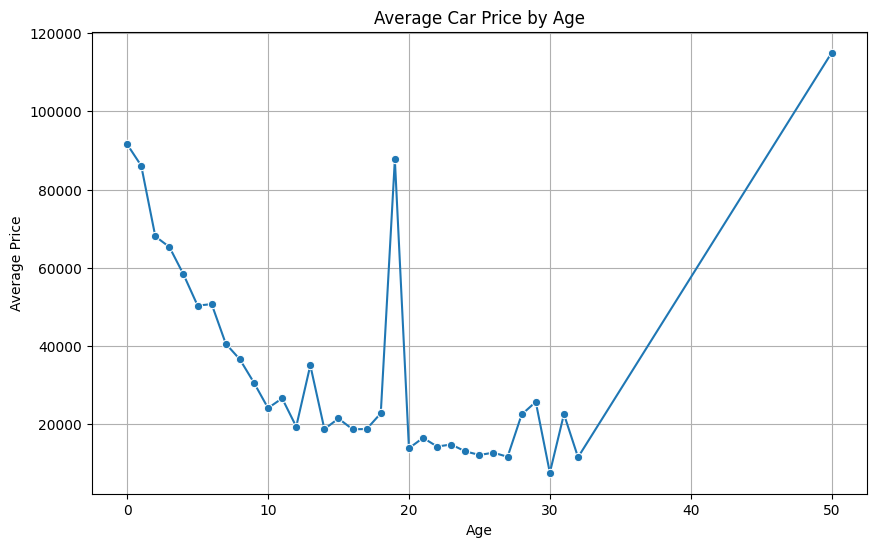

In [53]:
avg_price_per_year = df.groupby('Age')['price (in $)'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='price (in $)', data=avg_price_per_year, marker='o')
plt.title('Average Car Price by Age')
plt.xlabel('Age')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

### Handling outliers in the Age

<Axes: ylabel='Age'>

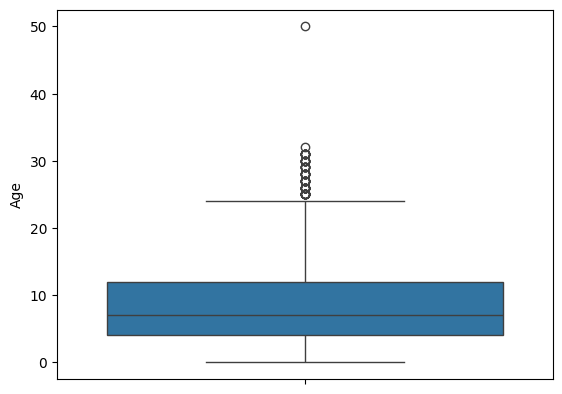

In [54]:
sns.boxplot(data=df["Age"])

In [55]:
# Calculate Q1, Q3, and IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")

# Identify outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print(f"Outliers: \n{outliers}")

Lower Bound: -8.0, Upper Bound: 24.0
Outliers: 
        brand   engine  transmission  ext_col  int_col  accident  \
163   27999.0  26500.0       10725.0  30000.0  19485.0         1   
167   30000.0  15500.0       20500.0  30000.0  19485.0         1   
257   27999.0  15300.0       20500.0  30000.0  19447.5         1   
387   21450.0   7800.0       10725.0  27000.0  32500.0         0   
437   20049.5   7800.0       12499.0  36750.0  19485.0         0   
...       ...      ...           ...      ...      ...       ...   
3772  30000.0  11999.5       12499.0  27000.0  32500.0         1   
3882  20049.5   7800.0       20500.0  36750.0  19485.0         0   
3918  59900.0  15300.0       34000.0  29000.0  19447.5         1   
3922  20049.5  15300.0       20500.0  33100.0  32500.0         0   
3984  27999.0  15300.0       20500.0  36750.0  19485.0         1   

      not_clean_title  Age  price (in $)  mileage (in miles)  \
163                 1   27         26500              213000   
167    

### Decision Tree and the other ensemble techniques are not sensitive to outliers

In [56]:
df.isnull().sum()

brand                  0
engine                 0
transmission           0
ext_col                0
int_col                0
accident               0
not_clean_title        0
Age                    0
price (in $)           0
mileage (in miles)     0
fuel_type_Encoded      0
model_encoded_Price    0
dtype: int64

In [57]:
X,y=df.drop('price (in $)',axis=1),df['price (in $)']

In [58]:
df.corr()["price (in $)"]

brand                  0.576156
engine                 0.767241
transmission           0.341925
ext_col                0.312480
int_col                0.357916
accident               0.114088
not_clean_title       -0.085710
Age                   -0.199496
price (in $)           1.000000
mileage (in miles)    -0.305528
fuel_type_Encoded      0.028199
model_encoded_Price    0.783480
Name: price (in $), dtype: float64

### Train-Test-Val split

In [59]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.2,random_state=42)

In [60]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

dt=DecisionTreeRegressor()
rf=RandomForestRegressor()

In [61]:
dt.fit(X,y)
rf.fit(X,y)

print(f"Important features for decision tree: {dt.feature_importances_}")
print(f"Important features for random forest: {rf.feature_importances_}")

pd.DataFrame({"feature":X.columns,"importance":dt.feature_importances_})

Important features for decision tree: [2.89151286e-03 2.86585683e-01 1.36908717e-03 6.59007707e-03
 8.35146873e-03 7.37784466e-05 2.00412344e-04 1.11321996e-03
 9.71912068e-02 1.15667804e-04 5.95517886e-01]
Important features for random forest: [3.25897498e-02 1.43269475e-01 2.93645790e-02 1.75249560e-02
 1.25950387e-02 2.99263713e-02 2.07536516e-04 5.24647205e-02
 1.03194223e-01 2.46761438e-04 5.78616589e-01]


,feature,importance
0,brand,0.002892
1,engine,0.286586
2,transmission,0.001369
3,ext_col,0.006590
4,int_col,0.008351
5,accident,0.000074
6,not_clean_title,0.000200
7,Age,0.001113
8,mileage (in miles),0.097191
9,fuel_type_Encoded,0.000116


### Model Training

In [81]:
model0=dt.fit(X_train,y_train)
model1=rf.fit(X_train,y_train)

print(f"Train score of Decision Tree: {model0.score(X_train,y_train)}")
print(f"Train score of Random Forest: {model1.score(X_train,y_train)}")

print(f"Train loss of Decision Tree: {1-model0.score(X_train,y_train)}")
print(f"Train loss of Random Forest: {1-model1.score(X_train,y_train)}")

Train score of Decision Tree: 1.0
Train score of Random Forest: 0.9892595291195403
Train loss of Decision Tree: 0.0
Train loss of Random Forest: 0.010740470880459707


In [82]:
print(f"Val score of Decision Tree: {model0.score(X_val,y_val)}")
print(f"Val score of Random Forest: {model1.score(X_val,y_val)}")

print(f"Val loss of Decision Tree: {1-model0.score(X_val,y_val)}")
print(f"Val loss of Random Forest: {1-model1.score(X_val,y_val)}")

Val score of Decision Tree: 0.9084119018162716
Val score of Random Forest: 0.9434283038931918
Val loss of Decision Tree: 0.09158809818372837
Val loss of Random Forest: 0.056571696106808234


In [83]:
print(f"Test score of Decision Tree: {model0.score(X_test,y_test)}")
print(f"Test score of Random Forest: {model1.score(X_test,y_test)}")

print(f"Test loss of Decision Tree: {1-model0.score(X_test,y_test)}")
print(f"Test loss of Random Forest: {1-model1.score(X_test,y_test)}")

Test score of Decision Tree: 0.30539736173199283
Test score of Random Forest: 0.29793125448576263
Test loss of Decision Tree: 0.6946026382680072
Test loss of Random Forest: 0.7020687455142374


### HyperParameter Tuning

In [102]:
param_grid_dt = {
    'max_depth': [7, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter':['best','random'],
    'random_state':[42],
    'max_features':[1.0,'sqrt','log2']
}

param_grid_rf = {
    'n_estimators': [100, 200, 400],
    'max_depth': [10, 20, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2'],
}

In [103]:
from sklearn.model_selection import GridSearchCV

grid_search_dt = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid_dt, cv=5, scoring='r2')
grid_search_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='r2')

In [88]:
from sklearn.model_selection import cross_val_score
grid_search_dt.fit(X, y)

print(f"Best parameters for decision tree: {grid_search_dt.best_params_}")
print(f"Best score for decision tree: {grid_search_dt.best_score_}")

Best parameters for decision tree: {'max_depth': 10, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 42, 'splitter': 'best'}
Best score for decision tree: 0.7822972781733488


In [100]:
model2=DecisionTreeRegressor(max_depth=10,max_features= 1.0,min_samples_leaf=1)

model2.fit(X_train,y_train)

print(f"Cross validation score for decision tree: {cross_val_score(model2, X_train, y_train, cv=5, scoring='r2').mean()}")

Cross validation score for decision tree: 0.8892042182601918


In [101]:
print(f"Validation score of Decision Tree: {model2.score(X_val,y_val)}")
print(f"Test score of Decision Tree: {model2.score(X_test,y_test)}")

Validation score of Decision Tree: 0.9128831942079998
Test score of Decision Tree: 0.3002434943377148


In [104]:
grid_search_rf.fit(X, y)

print(f"Best parameters for random forest: {grid_search_rf.best_params_}")

KeyboardInterrupt: 

### Resolving overfitting

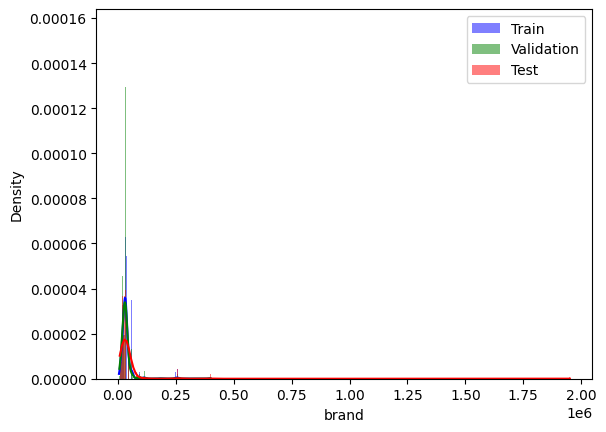

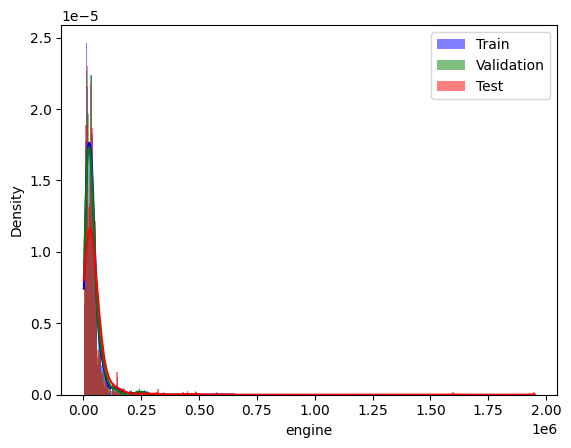

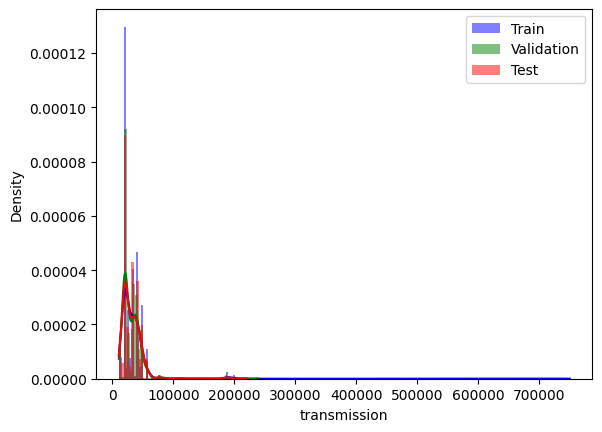

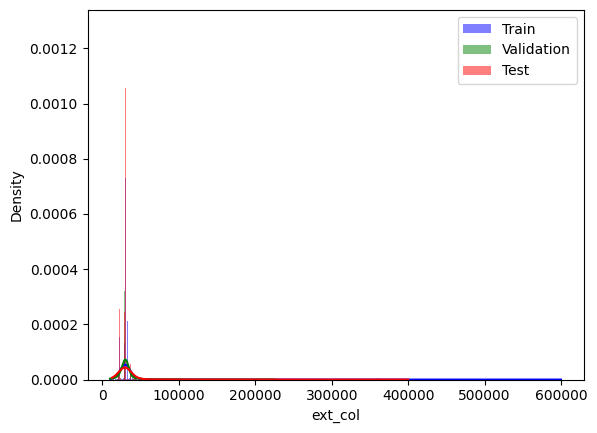

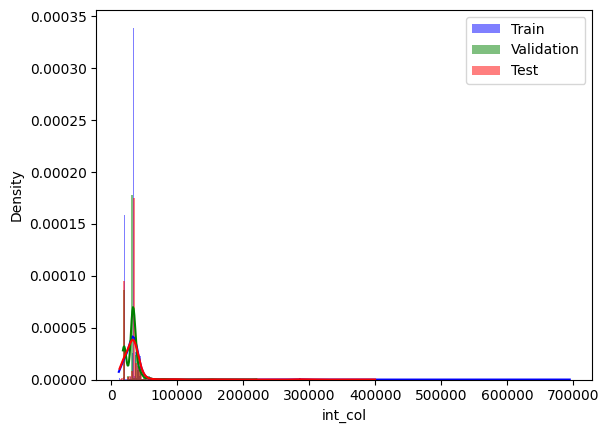

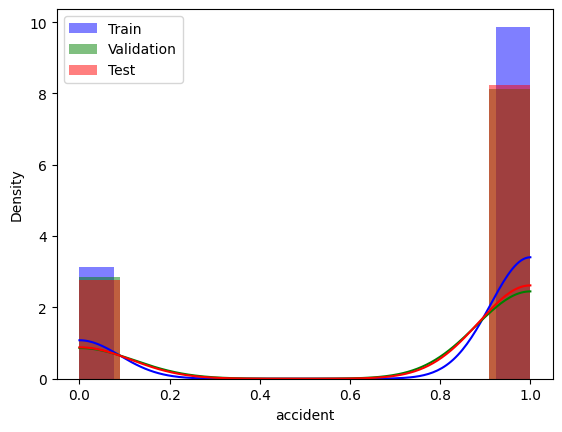

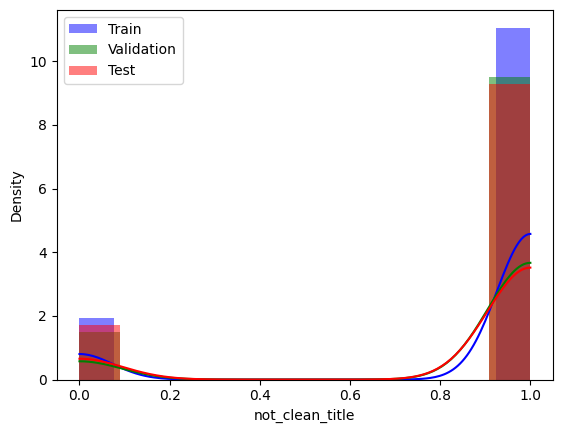

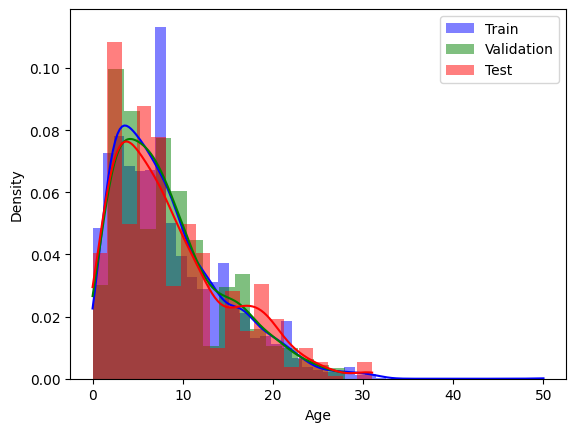

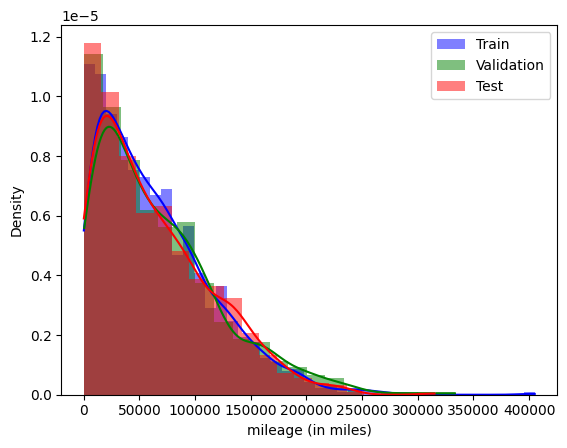

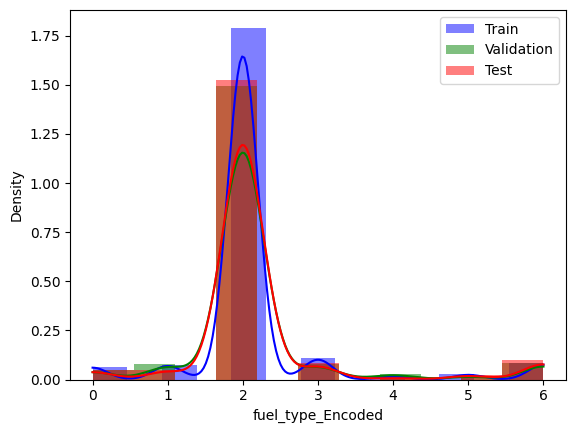

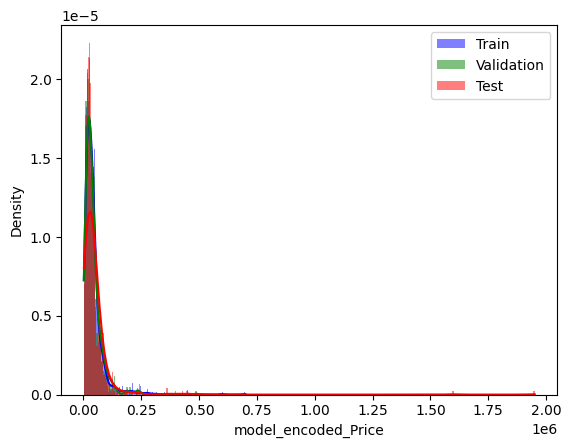

In [92]:
#Observing data distribution of all the datasets
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of features
for column in X_train.columns:
    sns.histplot(X_train[column], color="blue", label="Train", kde=True, stat="density", linewidth=0)
    sns.histplot(X_val[column], color="green", label="Validation", kde=True, stat="density", linewidth=0)
    sns.histplot(X_test[column], color="red", label="Test", kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.show()

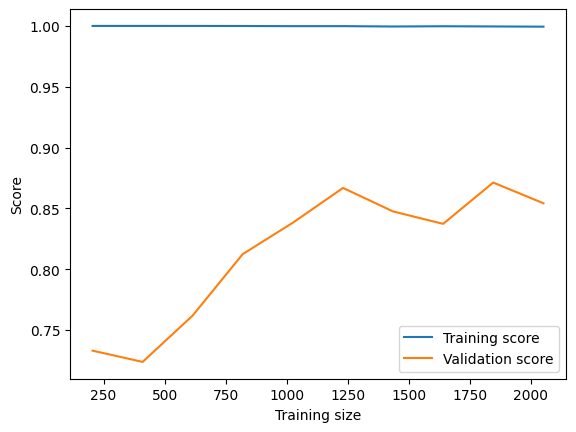

In [93]:
#Learning Curve

from sklearn.model_selection import learning_curve

train_sizes, train_scores, val_scores = learning_curve(model2, X_train, y_train, cv=5, scoring='r2',
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, val_scores_mean, label='Validation score')
plt.xlabel('Training size')
plt.ylabel('Score')
plt.legend()
plt.show()